In [2]:
from dataset import ImageDataset
from training_config import doodles, reals, doodle_size, real_size, NUM_CLASSES

train_set = ImageDataset(doodles, reals, doodle_size, real_size, train=True)
val_set = ImageDataset(doodles, reals, doodle_size, real_size, train=False)

# tunable hyper params.
use_cnn = True
num_epochs, base_bs, base_lr = 20, 512, 2e-2
c1, c2, t = 1, 1, 0.1  # contrastive learning. if you want vanilla (cross-entropy) training, set c1 and c2 to 0.
dropout = 0.2
add_layer = True

# models
from models import ExampleCNN
doodle_model = ExampleCNN(1, NUM_CLASSES, dropout, add_layer)
real_model = ExampleCNN(3, NUM_CLASSES, dropout, add_layer)

from utils import load_model_dic
doodle_model = load_model_dic(doodle_model, 'exp_data/0/0_model1.pt')
real_model = load_model_dic(real_model, 'exp_data/0/0_model2.pt')

Train = True. Doodle list: ['sketchy_doodle', 'tuberlin', 'google_doodles'], 
 real list: ['sketchy_real', 'google_real', 'cifar']. 
 classes: dict_keys(['airplane', 'car', 'cat', 'dog', 'frog', 'horse', 'truck', 'bird', 'ship']) 
Doodle data size 7022, real data size 46364, ratio 0.15145371408851696
Train = False. Doodle list: ['sketchy_doodle', 'tuberlin', 'google_doodles'], 
 real list: ['sketchy_real', 'google_real', 'cifar']. 
 classes: dict_keys(['airplane', 'car', 'cat', 'dog', 'frog', 'horse', 'truck', 'bird', 'ship']) 
Doodle data size 1764, real data size 9341, ratio 0.18884487742211756
Model loaded: exp_data/0/0_model1.pt
Model loaded: exp_data/0/0_model2.pt


In [3]:
from engine import Engine
engine = Engine(val_set, doodle_model, real_model)

building database... [0 / 9341]
building database... [1000 / 9341]
building database... [2000 / 9341]
building database... [3000 / 9341]
building database... [4000 / 9341]
building database... [5000 / 9341]
building database... [6000 / 9341]
building database... [7000 / 9341]
building database... [8000 / 9341]
building database... [9000 / 9341]
Engine ready. Database size: 9341


In [4]:
doodle, doodle_label, _, _ = train_set[0]    # a random doodle sample

In [5]:
print(doodle.shape)

out_samples = engine.query(doodle, topk=10)
print(len(out_samples))

torch.Size([1, 64, 64])
10


In [6]:
# check the labels of the returned samples, which ideally should be the same as the doodle_label
for pic, label in out_samples:
    print(label)

0
0
1
0
2
0
0
0
0
0


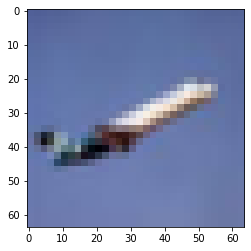

In [12]:
import matplotlib.pyplot as plt
plt.imshow(pic)  # show a picture